In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split

In [2]:
sns.set_palette("icefire")

In [2]:
# Plot sequence length of real and synthetic data 
# Look at the amount of events per sequence 
# How often each event occurs (total/avg)
# Qualities of discharge feature:
# No discharges occur within the first 72 hours 
# Discharge should only occur once within each sequence 
# No events should occur after discharge 

In [3]:
real_train = pd.read_csv("data_120_2_train.csv")
real_test = pd.read_csv("data_120_2_test.csv")
timegan= pd.read_csv("timegan_32_50_2000.csv")
deepecho = pd.read_csv("deepEcho_120_4000epoch.csv")
ehrmgan = pd.read_csv("ehrMGAN39.csv")
corgan = pd.read_csv("corgan2.csv")
ctgan = pd.read_csv("CTGAN.csv")
doppel = pd.read_csv("gendoppel1.csv")
pate = pd.read_csv("patenew.csv")

In [2]:
real_train = pd.read_csv("data_120_2_train.csv")
real_test = pd.read_csv("data_120_2_test.csv")
timegan = pd.read_csv("timegan_32_50_2000.csv")
deepecho = pd.read_csv("deepEcho_120_1000epoch.csv")
ehrmgan = pd.read_csv("ehrMGAN39.csv")
corgan = pd.read_csv("corgan2.csv")
ctgan = pd.read_csv("CTGAN.csv")
doppel = pd.read_csv("gendoppel1.csv")
pate = pd.read_csv("PATEGAN.csv")

In [4]:
real_testdata = pd.read_csv("data_168_12_test.csv")
real_traindata = pd.read_csv("data_168_12_train.csv")
timeGANdata = pd.read_csv("timegan_32_50_2000.csv")
deepEchodata = pd.read_csv("deepEcho_168_2000epoch.csv")
ehrMGANdata = pd.read_csv("ehrMGAN_168_30_400_400f.csv")

In [48]:
real_testdata = pd.read_csv("data_72_12_test.csv")
real_traindata = pd.read_csv("data_72_12_train.csv")
timeGANdata = pd.read_csv("TimeGAN72generated_32_50_2000.csv")
deepEchodata = pd.read_csv("deepEcho_72_2000epoch.csv")
ehrMGANdata = pd.read_csv("ehrMGAN_72_30_10_10ndis.csv")

In [22]:
real_traindata = pd.read_csv("data_168_12_large_train.csv")
real_testdata = pd.read_csv("data_168_12_large_test.csv")
timeGANdata = pd.read_csv("TimeGANlargegenerated_32_50_2000.csv")
#timegan1 = pd.read_csv("TimeGANlargegenerated_32_30_2000.csv")
deepEchodata = pd.read_csv("largedeepEcho_168_2000epoch.csv")
ehrMGANdata= pd.read_csv("ehrMGAN_168_30_400_400largef.csv")

In [23]:
# select sample equal to test dataset size 
def getsample(data, n=0.4):
    trainids, testids = train_test_split(list(set(data["hadm_id"])), test_size=n, random_state=499)
    testids = testids[:200]
    return data[data["hadm_id"].isin(testids)]

real_train = getsample(real_traindata)
real_test = getsample(real_testdata, n=0.95)
timeGAN = getsample(timeGANdata)
deepEcho = getsample(deepEchodata)
ehrMGAN = getsample(ehrMGANdata)

In [33]:
real_test

,hadm_id,hour,Urinalysis,Blood Products,Insulin,Glucose,Calcium,ABG,Antibiotics,CBC,Electrolytes
0,27342858,0,0,0,0,1,1,1,0,1,1
1,27342858,12,0,0,1,1,1,1,1,1,1
2,27342858,24,0,0,1,0,1,1,1,1,1
3,27342858,36,0,0,0,1,0,0,0,1,1
4,27342858,48,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1657,23748597,12,0,0,1,0,1,1,1,1,1
1658,23748597,24,0,0,1,0,0,0,1,0,0
1659,23748597,36,0,0,0,1,0,1,0,1,1
1660,23748597,48,0,0,0,0,0,0,0,0,0


In [32]:
ehrMGAN 

,hadm_id,ABG,Insulin,Calcium,Blood Products,Antibiotics,Electrolytes,Glucose,Discharged,CBC,hour
18,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0
19,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12
20,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,24
21,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,36
22,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,48
...,...,...,...,...,...,...,...,...,...,...,...
4675,779.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12
4676,779.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,24
4677,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,36
4678,779.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,48


In [ ]:
# event frequency 

In [298]:
def reformat(data, label):
    reformatted = pd.DataFrame(columns = ['hadm_id', 'hour', 'event'])
    for c in list(real_test.columns)[2:]:
        temp = data[data[c]==1]
        temp["event"] = c
        reformatted = pd.concat([reformatted, temp[["hadm_id","hour","event"]]], ignore_index=True)
    reformatted["label"] = label
    return reformatted
realf = reformat(real_test , "Real")      
timeGANf = reformat(timeGAN, "timeGAN") 
deepEchof = reformat(deepEcho, "deepEcho")
ehrf = reformat(ehrMGAN, "EHR-M-GAN")

comb_event = pd.concat([realf,timeGANf, deepEchof, ehrf], ignore_index=True)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


/Users/lilyfelstead/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [299]:
comb_event

,hadm_id,hour,event,label
0,27342858,0,ABG,Real
1,27342858,12,ABG,Real
2,27342858,24,ABG,Real
3,27342858,60,ABG,Real
4,22669333,0,ABG,Real
...,...,...,...,...
22421,509.0,0,CBC,EHR-M-GAN
22422,509.0,12,CBC,EHR-M-GAN
22423,509.0,24,CBC,EHR-M-GAN
22424,509.0,36,CBC,EHR-M-GAN


In [300]:
plot = sns.countplot(data=comb_event, x="event", hue="label",order=comb_event.event.value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.axes.set_title("Event Frequency",fontsize=20)
plt.savefig("EventTotalFrequency.png")
plt.show()

OSError: [Errno 28] No space left on device: 'EventTotalFrequency.png'

In [124]:
real_testeventavg = real_test.groupby('hadm_id').sum().mean().reset_index().drop([0])
real_testeventavg["label"] = "real"
timeeventavg = timeGAN.groupby('hadm_id').sum().mean().reset_index().drop([0])
timeeventavg["label"] = "TimeGAN"
deepeventavg = deepEcho.groupby('hadm_id').sum().mean().reset_index().drop([10])
deepeventavg["label"] = "DeepEcho"

comb_event_avg = pd.concat([real_testeventavg, timeeventavg, deepeventavg], ignore_index=True)
comb_event_avg.rename({"index":"Event", 0:"Average Occurance"}, inplace=True, axis=1)
comb_event_avg

,Event,Average Occurance,label
0,ABG,3.335,real
1,Insulin,1.755,real
2,Calcium,3.170,real
3,Blood Products,0.355,real
4,Antibiotics,2.070,real
5,Electrolytes,6.065,real
6,Glucose,5.270,real
7,Discharged,1.000,real
8,CBC,5.715,real
9,Urinalysis,0.280,real


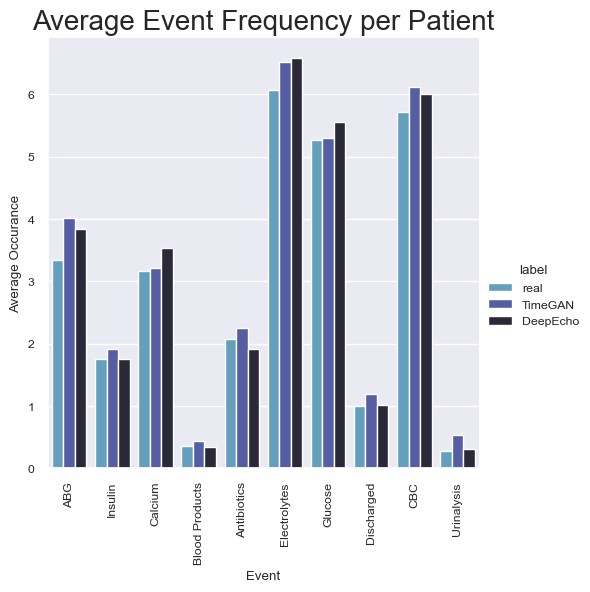

In [262]:
plot = sns.catplot(data=comb_event_avg, kind="bar", x="Event", y="Average Occurance", hue="label")
plot.set_xticklabels(rotation=90)
plot.ax.set_title("Average Event Frequency per Patient",fontsize=20)
plt.savefig("EventAverageFrequency.png")
plt.show()

In [ ]:
# plot sequence length 

In [ ]:
# for each sequence find the time associated with the first 1 in discharged 

In [99]:
def sequencelength(data, label):
    reformatted = pd.DataFrame(columns = ['hadm_id', 'discharge_time'])
    mistakes = {"no discharge":0, "multiple discharge":0}
    ids = list(set(data["hadm_id"]))
    for i in ids:
        temp = data[data["hadm_id"]==i]
        temp = temp[temp["Discharged"]==1]
        if len(temp) > 1: mistakes["multiple discharge"] += 1
        if len(temp) == 0: mistakes["no discharge"] += 1
        else:
            reformatted = reformatted.append({'hadm_id':i, 'discharge_time':temp.iloc[0]["hour"]}, ignore_index=True)
    reformatted["label"] = label
    return reformatted, mistakes 


In [100]:
timesequences, timemistakes = sequencelength(timeGAN, "TimeGAN")
deepsequences, deepmistakes = sequencelength(deepEcho, "deepEcho")
realsequences, realmistakes = sequencelength(real_test, "Real")

comb_sequences = pd.concat([realsequences, timesequences, deepsequences], ignore_index=True)

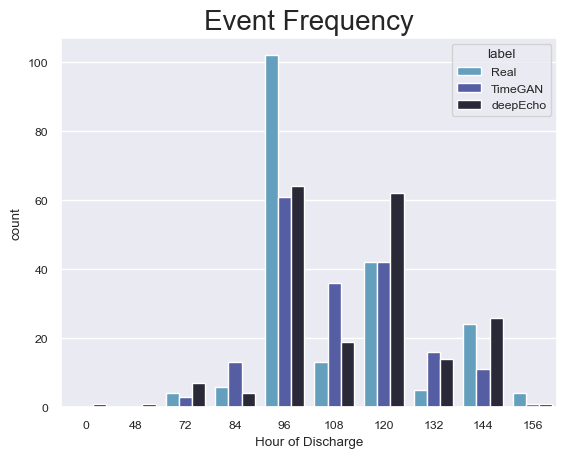

In [263]:
plot=sns.countplot(data=comb_sequences, x="discharge_time", hue="label")
#plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.axes.set_title("Event Frequency",fontsize=20)
plot.axes.set(xlabel="Hour of Discharge")
plt.savefig("sequencelength.png")
plt.show()

In [17]:
sns.set(font_scale=0.8)

In [35]:
real_test_r = real_test.drop(["hadm_id", "hour"], axis=1)

In [36]:
timeGAN_r = timeGAN.drop(["hadm_id", "hour"], axis=1)

In [38]:
ehrMGAN_r = ehrMGAN.drop(["hadm_id", "hour"], axis=1)

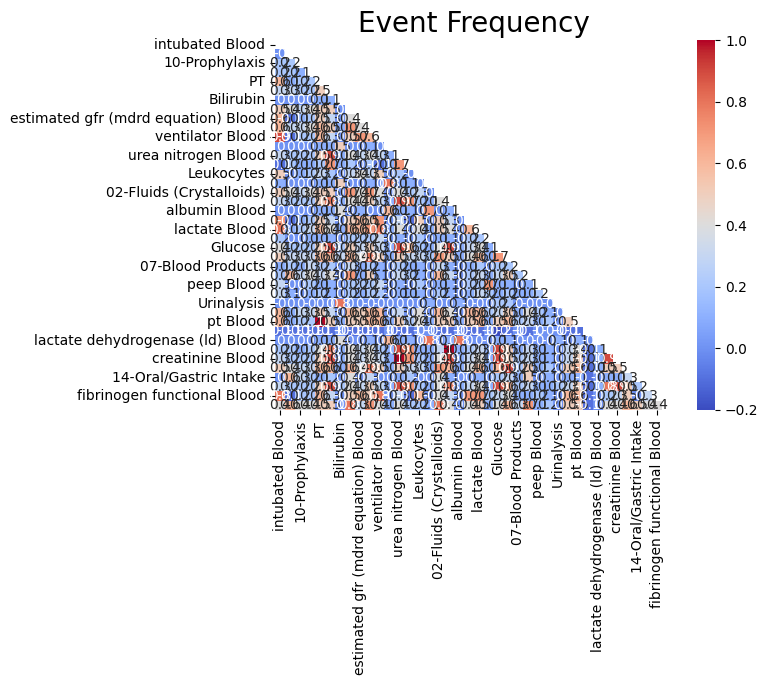

In [21]:
mask = np.triu(np.ones_like(real_test_r.corr()))
plot = sns.heatmap(real_test_r.corr().round(1), annot=True, cmap="coolwarm", mask=mask)
plot.axes.set_title("Event Frequency",fontsize=20)
plt.show()

In [5]:
# : V in [0, .1) is low, [.1, .3) is weak, [.3, .5) is middle and [.5, 1) is strong.

#weak negative, middle negative, strong negative
# -0.1 -0.2 -0.3     -0.4 -0.5 -0.6       -0.7 -0.8 -0.9 
# weak postive, middle postive, strong postive
# 0.0 0.1 0.2 0.3     0.4 0.5 0.6       0.7 0.8 0.9 
corrdic = {0.0:"low", 0.1:"low",
           0.2:"weak", 0.3:"weak",    
           0.4:"middle", 0.5:"middle", 
           0.6:"strong", 0.7:"strong", 0.8:"strong", 0.9:"strong", 1.0:"strong" }


In [7]:
def calcCorAcc(data1, data2, label):
    data1 = data1.drop(["hadm_id", "hour"], axis=1)
    data2 = data2.drop(["hadm_id", "hour"], axis=1)
    
    data1map = abs(data1.corr().round(1)).replace(corrdic)
    data2map = abs(data2.corr().round(1)).replace(corrdic)
    
    CorAcc = (data1map.sort_index().sort_index(axis=1)==data2map.sort_index().sort_index(axis=1)).sum().sum()/(len(data1map )**2)
    
    mask = np.triu(np.ones_like(data1.corr()))
    s=sns.heatmap(abs(data1.corr().round(1)),  cmap="coolwarm", mask=mask) #cmap="Greys_r")
    s.axes.set_title("Real",fontsize=20)
    plt.savefig("RealCorAcc.png")
    plt.show()
    
    mask = np.triu(np.ones_like(data2.corr()))
    s=sns.heatmap(abs(data2.corr().round(1)),  cmap="coolwarm", mask=mask)
    s.axes.set_title(label+' CorAcc='+ str(round(CorAcc,2)),fontsize=20)
    plt.savefig(label+"CorAcc.png")
    plt.show()
    
    return CorAcc

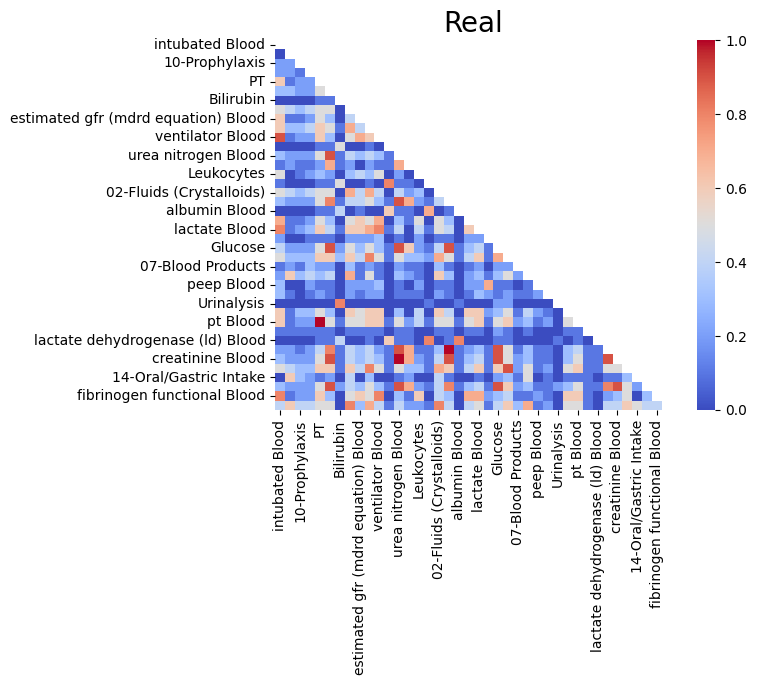

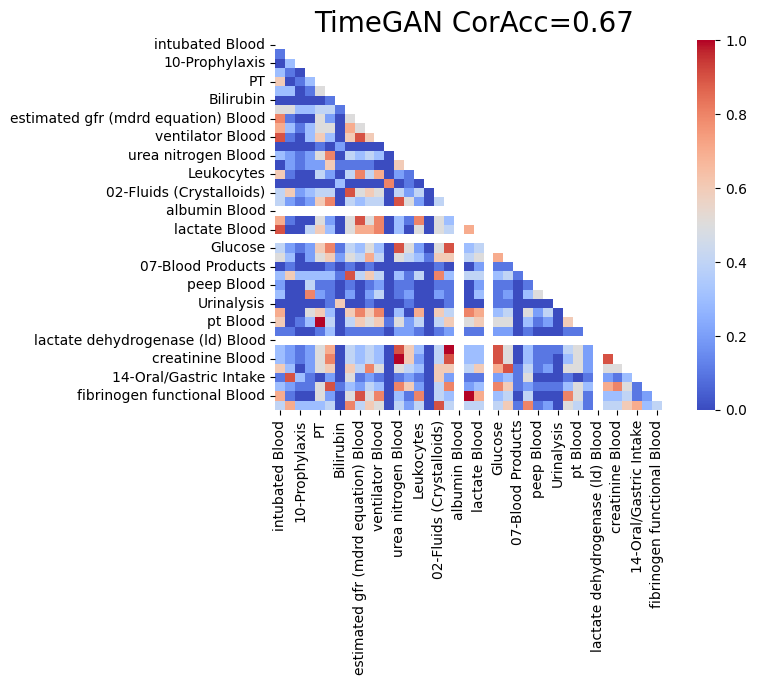

0.673125

In [27]:
calcCorAcc(real_test, timeGAN, "TimeGAN")

In [8]:
calcCorAcc(real_test, deepEcho, "DeepEcho")

NameError: name 'deepEcho' is not defined

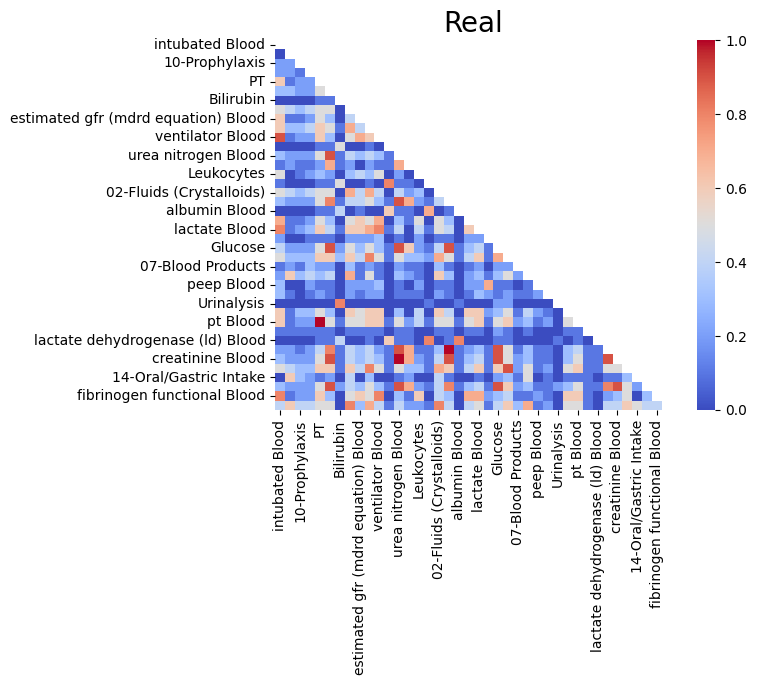

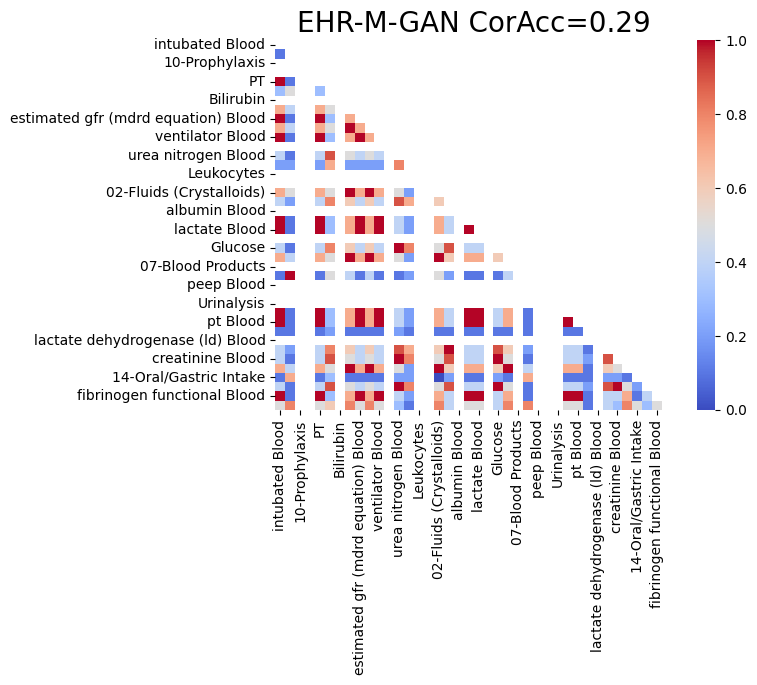

0.286875

In [24]:
calcCorAcc(real_test, ehrMGAN, "EHR-M-GAN")

In [19]:
set(real_test.columns).difference(set(ehrMGAN.columns))

{'01-Drips', 'Bilirubin'}

In [20]:
real_test

,hadm_id,hour,intubated Blood,06-Insulin (Non IV),10-Prophylaxis,04-Fluids (Colloids),PT,Electrolytes,Bilirubin,01-Drips,...,pt Blood,Discharged,lactate dehydrogenase (ld) Blood,anion gap Blood,creatinine Blood,Calcium,14-Oral/Gastric Intake,CBC,fibrinogen functional Blood,05-Med Bolus
0,27342858,0,1,0,0,0,1,1,0,1,...,1,0,0,1,1,1,0,1,1,1
1,27342858,12,0,1,0,1,1,1,0,1,...,1,0,0,1,1,1,0,1,0,1
2,27342858,24,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,1
3,27342858,36,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
4,27342858,48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,23748597,108,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3188,23748597,120,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3189,23748597,132,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3190,23748597,144,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
ehrMGAN

,hadm_id,intubated Blood,06-Insulin (Non IV),10-Prophylaxis,04-Fluids (Colloids),PT,Electrolytes,"Bilirubin,01-Drips",estimated gfr (mdrd equation) Blood,specimen type Blood,...,lactate dehydrogenase (ld) Blood,anion gap Blood,creatinine Blood,Calcium,14-Oral/Gastric Intake,CBC,fibrinogen functional Blood,05-Med Bolus,40,hour
42,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0
43,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,12
44,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,24
45,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,36
46,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108
10916,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120
10917,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132
10918,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144


In [9]:
real_train = pd.read_csv("data_120_2_train.csv")
real_test = pd.read_csv("data_120_2_test.csv")
timegan = pd.read_csv("timegan_32_50_2000.csv")
deepecho = pd.read_csv("deepEcho_120_4000epoch.csv")
ehrmgan = pd.read_csv("ehrMGAN39.csv")
corgan = pd.read_csv("corgan2.csv")
ctgan = pd.read_csv("CTGAN.csv")
doppel = pd.read_csv("gendoppel1.csv")
pate = pd.read_csv("patenew.csv")

In [11]:
real = np.array(real_train.reindex(sorted(real_train.columns), axis=1).drop(["hadm_id", "hour"], axis=1))  # Replace with your data
time = np.array(timegan.reindex(sorted(timegan.columns), axis=1).drop(["hadm_id", "hour"], axis=1))  # Replace with your data
deep = np.array(deepecho.reindex(sorted(deepecho.columns), axis=1).drop(["hadm_id", "hour"], axis=1))  # Replace with your data
ehr = np.array(ehrmgan.reindex(sorted(ehrmgan.columns), axis=1).drop(["hadm_id", "hour"], axis=1))  # Replace with your data
cor = np.array(corgan.reindex(sorted(corgan.columns), axis=1).drop(["hadm_id", "hour"], axis=1))  # Replace with your data
ct = np.array(ctgan.reindex(sorted(ctgan.columns), axis=1).drop(["hadm_id", "hour"], axis=1))  # Replace with your data
dp = np.array(doppel.reindex(sorted(doppel.columns), axis=1).drop(["hadm_id", "hour"], axis=1))  # Replace with your data
pa = np.array(pate.reindex(sorted(pate.columns), axis=1).drop(["hadm_id", "hour"], axis=1)) # Replace with your data


In [13]:
names = list(real_train.reindex(sorted(real_train.columns), axis=1).drop(["hadm_id", "hour"], axis=1).columns)
names

['ABG',
 'Antibiotics',
 'Blood Products',
 'CBC',
 'Calcium',
 'Electrolytes',
 'Glucose',
 'Insulin',
 'Urinalysis']

In [27]:

def pearson_corr(matrix1, matrix2):
    mask = np.isfinite(matrix1) & np.isfinite(matrix2)
    masked_matrix1 = matrix1[mask]
    masked_matrix2 = matrix2[mask]
    
    if len(masked_matrix1) < 2:
        return np.nan  # Handle cases with insufficient data
    
    mean_matrix1 = np.mean(masked_matrix1)
    mean_matrix2 = np.mean(masked_matrix2)
    
    numerator = np.sum((masked_matrix1 - mean_matrix1) * (masked_matrix2 - mean_matrix2))
    denominator = np.sqrt(np.sum((masked_matrix1 - mean_matrix1) ** 2) * np.sum((masked_matrix2 - mean_matrix2) ** 2))
    
    return numerator / denominator

# Calculate correlation matrix for each dataset
corr_matrixreal = np.corrcoef(real, rowvar=False)
corr_matrixtime = np.corrcoef(time, rowvar=False)
corr_matrixdeep = np.corrcoef(deep, rowvar=False)
corr_matrixehr = np.corrcoef(ehr, rowvar=False)
corr_matrixcor = np.corrcoef(cor, rowvar=False)
corr_matrixct = np.corrcoef(ct, rowvar=False)
corr_matrixdp = np.corrcoef(dp, rowvar=False)
corr_matrixpa = np.corrcoef(pa, rowvar=False)

# Calculate Pearson correlation between correlation matrices
average_corr = pearson_corr(corr_matrix1, corr_matrix2)

#print("Average Pearson Correlation:", average_corr)

/Users/lilyfelstead/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/lilyfelstead/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [43]:
pearson_corr(corr_matrixreal, corr_matrixct )

0.9989081724916031

In [54]:
def heatmap(data1,title):
    data1 = pd.DataFrame(data1, index=names, columns=names)
    mask = np.triu(np.ones_like(data1))
    np.fill_diagonal(mask, 0)
    s=sns.heatmap(data1,  cmap="coolwarm", mask=mask) #cmap="Greys_r")
    s.axes.set_title(title,fontsize=20)
    plt.show()

In [ ]:
corr_matrixreal = np.corrcoef(real, rowvar=False)
corr_matrixtime = np.corrcoef(time, rowvar=False)
corr_matrixdeep = np.corrcoef(deep, rowvar=False)
corr_matrixehr = np.corrcoef(ehr, rowvar=False)
corr_matrixcor = np.corrcoef(cor, rowvar=False)
corr_matrixct = np.corrcoef(ct, rowvar=False)
corr_matrixdp = np.corrcoef(dp, rowvar=False)
corr_matrixpa = np.corrcoef(pa, rowvar=False)


In [65]:
name = ["TIME", "DEEP", "EHR", "COR", "CT", "DP", "PA"]
matrix = [corr_matrixtime, corr_matrixdeep, corr_matrixehr ,corr_matrixcor, corr_matrixct, corr_matrixdp, corr_matrixpa]
for d in range(7):
    print([name[d], matrix[d]])

['TIME', array([[ 1.        ,  0.30775696,  0.01610448,  0.54584072,  0.84552108,
         0.72037856,  0.80193602,  0.17541816,         nan],
       [ 0.30775696,  1.        , -0.01542668,  0.113126  ,  0.33796159,
         0.22964682,  0.2902302 ,  0.29605607,         nan],
       [ 0.01610448, -0.01542668,  1.        ,  0.10268173,  0.01305766,
        -0.0062126 ,  0.00462372, -0.01471237,         nan],
       [ 0.54584072,  0.113126  ,  0.10268173,  1.        ,  0.55803201,
         0.72332112,  0.61384528,  0.24611392,         nan],
       [ 0.84552108,  0.33796159,  0.01305766,  0.55803201,  1.        ,
         0.72935063,  0.86485768,  0.21142898,         nan],
       [ 0.72037856,  0.22964682, -0.0062126 ,  0.72332112,  0.72935063,
         1.        ,  0.83270256,  0.24941856,         nan],
       [ 0.80193602,  0.2902302 ,  0.00462372,  0.61384528,  0.86485768,
         0.83270256,  1.        ,  0.26095405,         nan],
       [ 0.17541816,  0.29605607, -0.01471237,  0.246

In [64]:
corr_matrixreal

array([[ 1.        ,  0.09001539,  0.09155915,  0.52105689,  0.77894982,
         0.64479578,  0.6908094 , -0.01061874, -0.00399753],
       [ 0.09001539,  1.        ,  0.04548222,  0.02967149,  0.0612758 ,
         0.05111096,  0.04317868,  0.13689757, -0.00553611],
       [ 0.09155915,  0.04548222,  1.        ,  0.04723137,  0.07516007,
         0.04688812,  0.05562272,  0.02209508,  0.00409276],
       [ 0.52105689,  0.02967149,  0.04723137,  1.        ,  0.57024898,
         0.82947452,  0.78126496, -0.03963837, -0.00122954],
       [ 0.77894982,  0.0612758 ,  0.07516007,  0.57024898,  1.        ,
         0.70050573,  0.70115011, -0.00630733,  0.00234254],
       [ 0.64479578,  0.05111096,  0.04688812,  0.82947452,  0.70050573,
         1.        ,  0.86030788, -0.0188027 ,  0.0026779 ],
       [ 0.6908094 ,  0.04317868,  0.05562272,  0.78126496,  0.70115011,
         0.86030788,  1.        , -0.03112413, -0.00192758],
       [-0.01061874,  0.13689757,  0.02209508, -0.03963837, -0

In [ ]:
print()

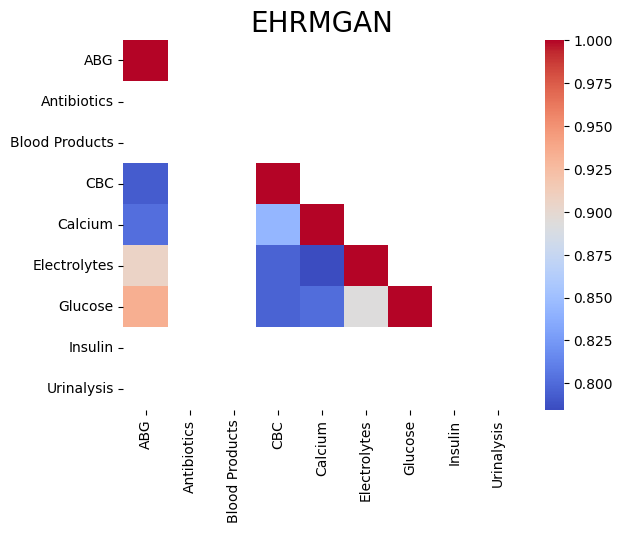

In [63]:
heatmap(corr_matrixehr, "EHRMGAN")

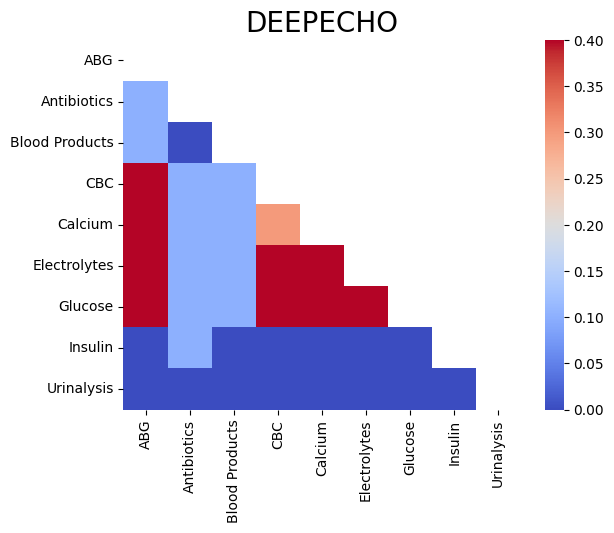

In [23]:
heatmap(corr_matrixdeep,"DEEPECHO")

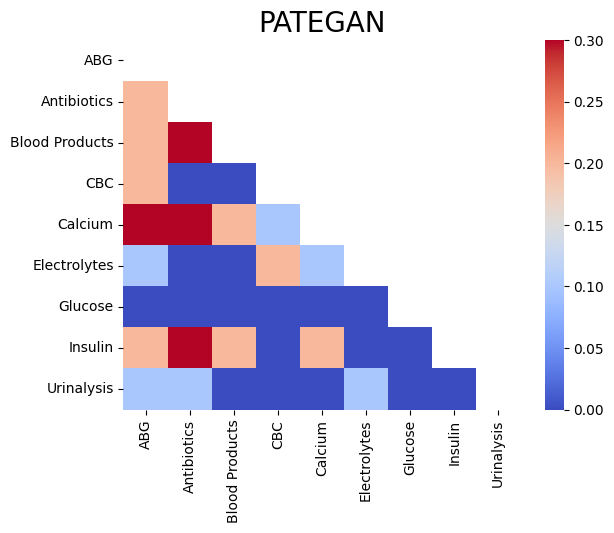

In [32]:
heatmap(corr_matrixpa,"PATEGAN")

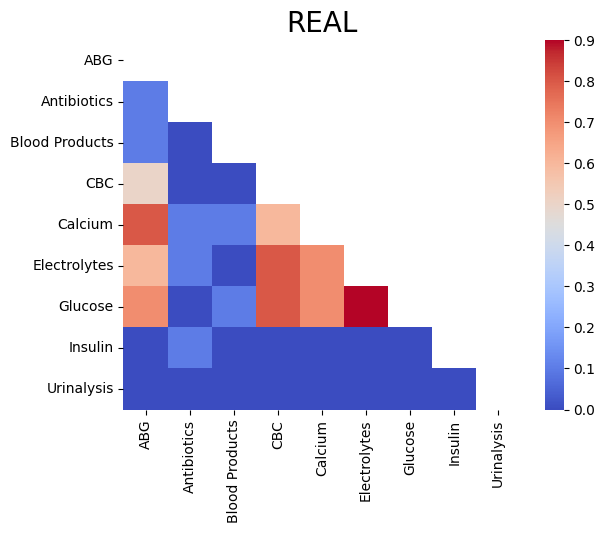

In [33]:
heatmap(corr_matrixreal,"REAL")